COMPUTATIONAL INTELLIGENCE
LAB PROJECT

NAME: RITESH GAJANAN ASOLE

PRN: 202301060014

NAME: Ayush Parihar

PRN: 202301070206

DIVISION:C

BATCH: C2

PROJECT TITLE :"**Jeevan_Urja:Intelligent Power Consumption Forecasting for Future Energy Systems "**

This project aims to forecast **electric power consumption** using **machine learning models** trained on environmental and temporal data such as **Temperature**, **Humidity**, **Wind Speed**, and **Solar Radiation (Diffuse & General Diffuse Flows)**.  
It uses three ML models — **Linear Regression**, **Random Forest**, and **KNN**, and evaluates them using metrics like **MAE**, **RMSE**, and **R² Score**.  

---

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load Dataset
data = pd.read_csv('/content/powerconsumption_2200.csv')
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
# Number of rows and columns
print("Dataset shape (rows, columns):", data.shape)

# Number of rows only
print("Number of rows:", len(data))

# Column names
print("Columns:", data.columns.tolist())


Dataset shape (rows, columns): (2200, 9)
Number of rows: 2200
Columns: ['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                2200 non-null   datetime64[ns]
 1   Temperature             2200 non-null   float64       
 2   Humidity                2200 non-null   float64       
 3   WindSpeed               2200 non-null   float64       
 4   GeneralDiffuseFlows     2200 non-null   float64       
 5   DiffuseFlows            2200 non-null   float64       
 6   PowerConsumption_Zone1  2200 non-null   float64       
 7   PowerConsumption_Zone2  2200 non-null   float64       
 8   PowerConsumption_Zone3  2200 non-null   float64       
 9   Hour                    2200 non-null   int32         
 10  Day                     2200 non-null   int32         
 11  Month                   2200 non-null   int32         
 12  Weekday                 2200 non-null   int32   

In [22]:
data.isnull().sum()

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0
Hour,0


In [24]:
data.duplicated().sum()

np.int64(0)

Data Cleaning

In [25]:
# Drop duplicates
data = data.drop_duplicates()
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month,Weekday,Total_Consumption,Year,DayOfWeek,IsWeekend
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,6,70425.53544,2017,6,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,6,69320.84387,2017,6,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,6,67803.22193,2017,6,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,6,65489.23209,2017,6,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,1,6,63650.44627,2017,6,1


In [26]:
#Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Hour                      0
Day                       0
Month                     0
Weekday                   0
Total_Consumption         0
Year                      0
DayOfWeek                 0
IsWeekend                 0
dtype: int64


In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='mixed')
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Weekday'] = data['Datetime'].dt.weekday
data['Total_Consumption'] = data['PowerConsumption_Zone1'] + data['PowerConsumption_Zone2'] + data['PowerConsumption_Zone3']

In [5]:

data.dropna(inplace=True)
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month,Weekday,Total_Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,6,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,6,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,6,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,6,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,1,6,63650.44627


In [6]:
print("Missing values:\n", data.isnull().sum())
print("Duplicate rows:", data.duplicated().sum())

Missing values:
 Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Hour                      0
Day                       0
Month                     0
Weekday                   0
Total_Consumption         0
dtype: int64
Duplicate rows: 0


In [7]:
#  — Extract Time Features

data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['IsWeekend'] = (data['DayOfWeek'] >= 5).astype(int)

# Verify new features
data.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month,Weekday,Total_Consumption,Year,DayOfWeek,IsWeekend
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,6,70425.53544,2017,6,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,6,69320.84387,2017,6,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,6,67803.22193,2017,6,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,6,65489.23209,2017,6,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,1,6,63650.44627,2017,6,1


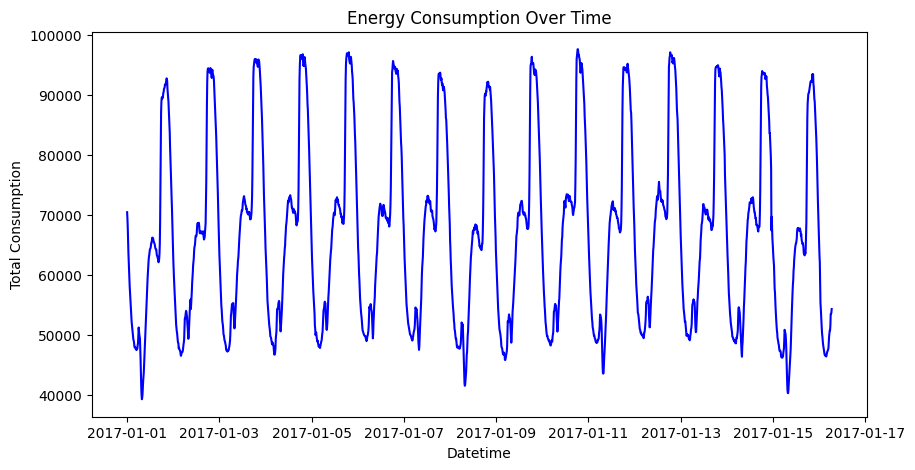

In [31]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
plt.plot(data['Datetime'], data['Total_Consumption'], color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Consumption')
plt.show()



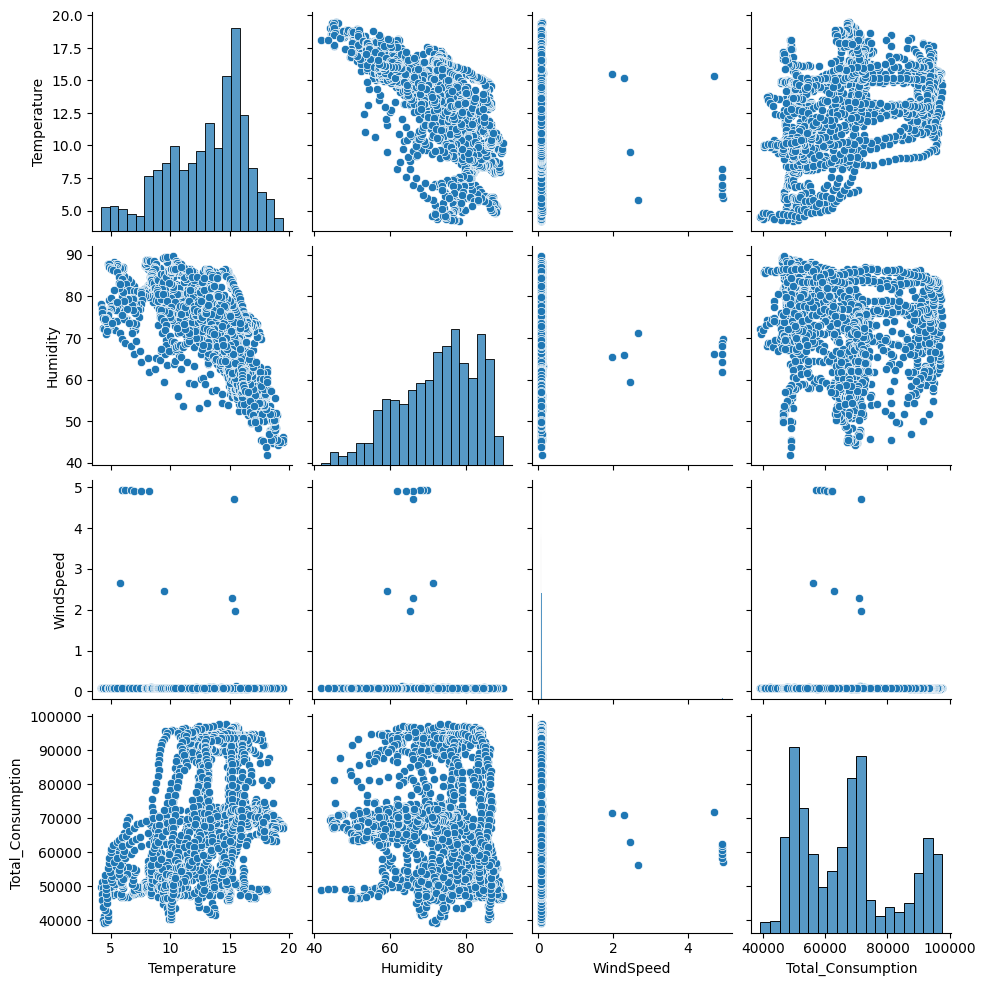

In [32]:
#Pairwise Relationships
sns.pairplot(data[['Temperature','Humidity','WindSpeed','Total_Consumption']])
plt.show()



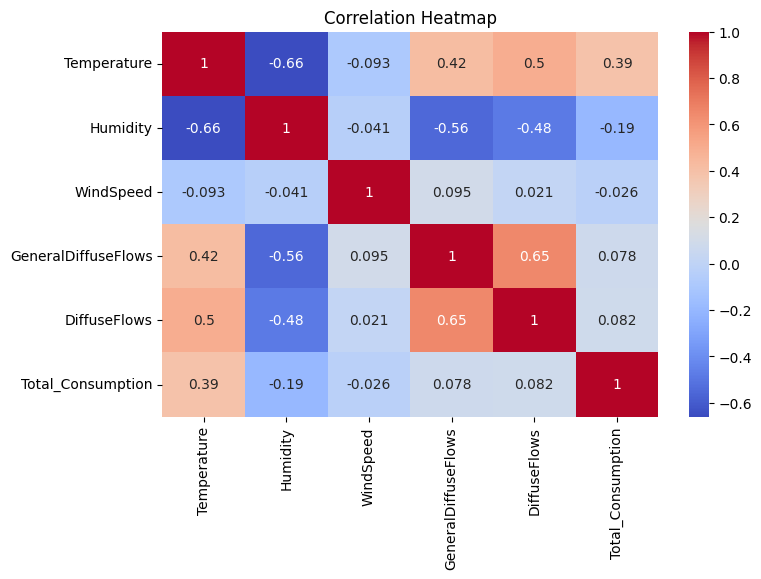

In [33]:
#Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','Total_Consumption']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

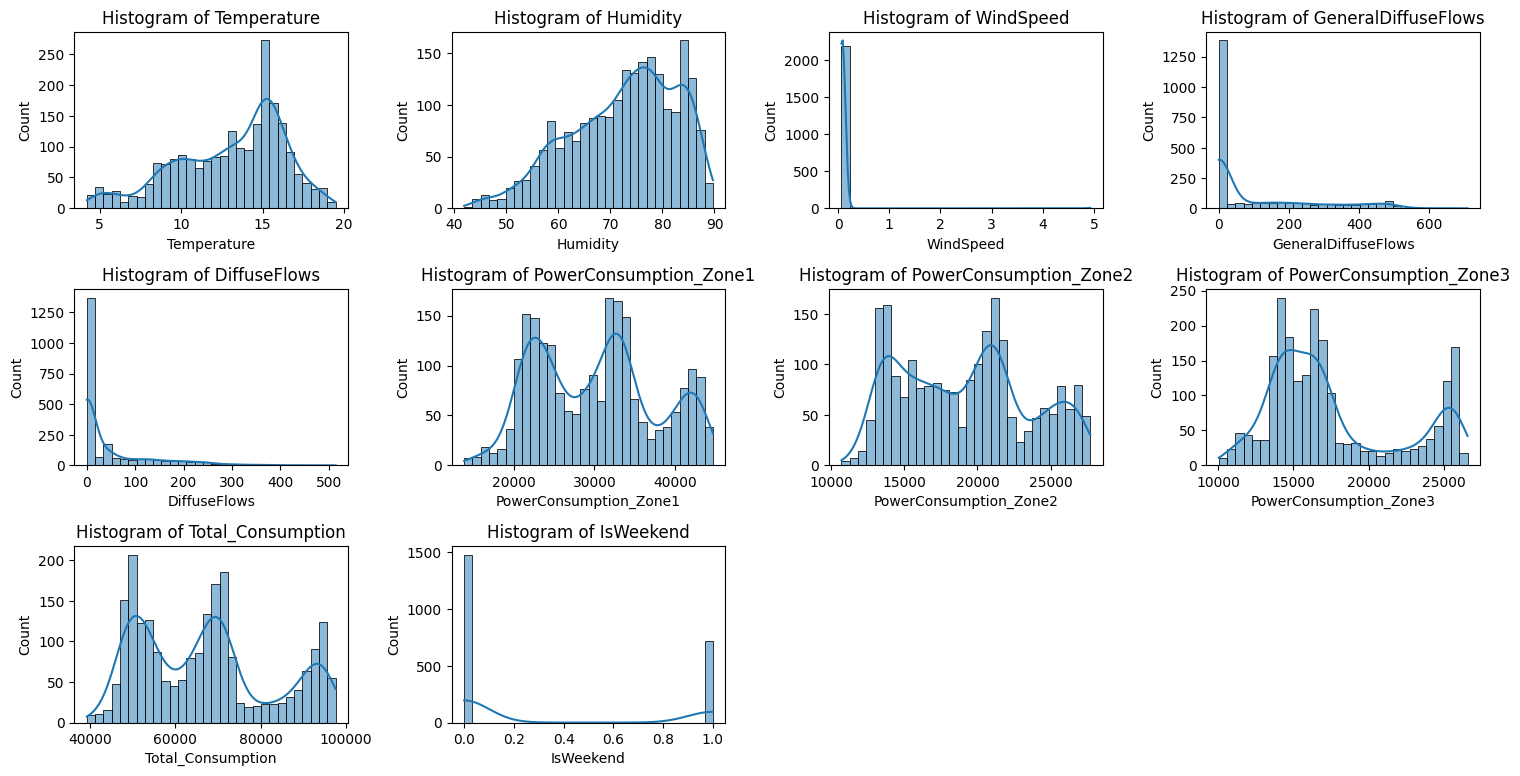

In [30]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

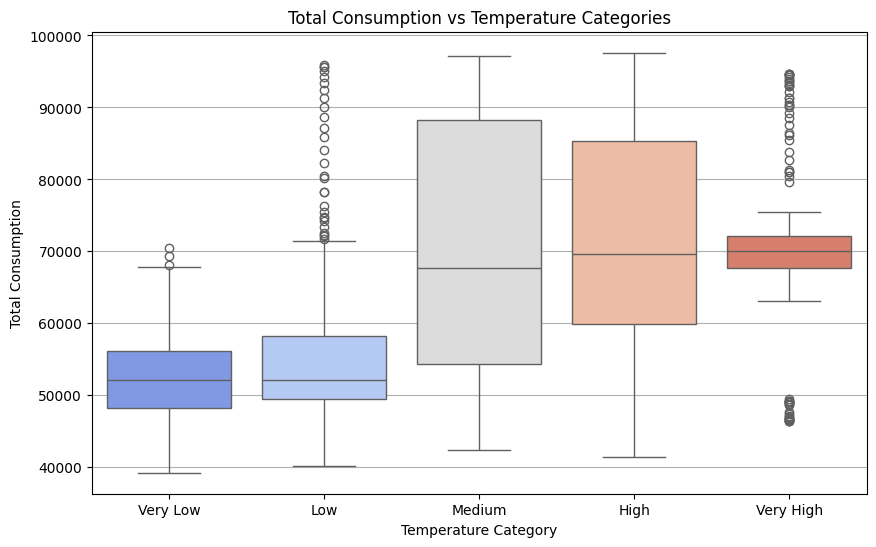

In [38]:
# Create temperature bins
# Let's define bins based on quartiles or meaningful ranges for temperature
data['Temperature_Category'] = pd.cut(data['Temperature'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Temperature_Category', y='Total_Consumption', data=data, palette='coolwarm')
plt.title('Total Consumption vs Temperature Categories')
plt.xlabel('Temperature Category')
plt.ylabel('Total Consumption')
plt.grid(True, axis='y')
plt.show()

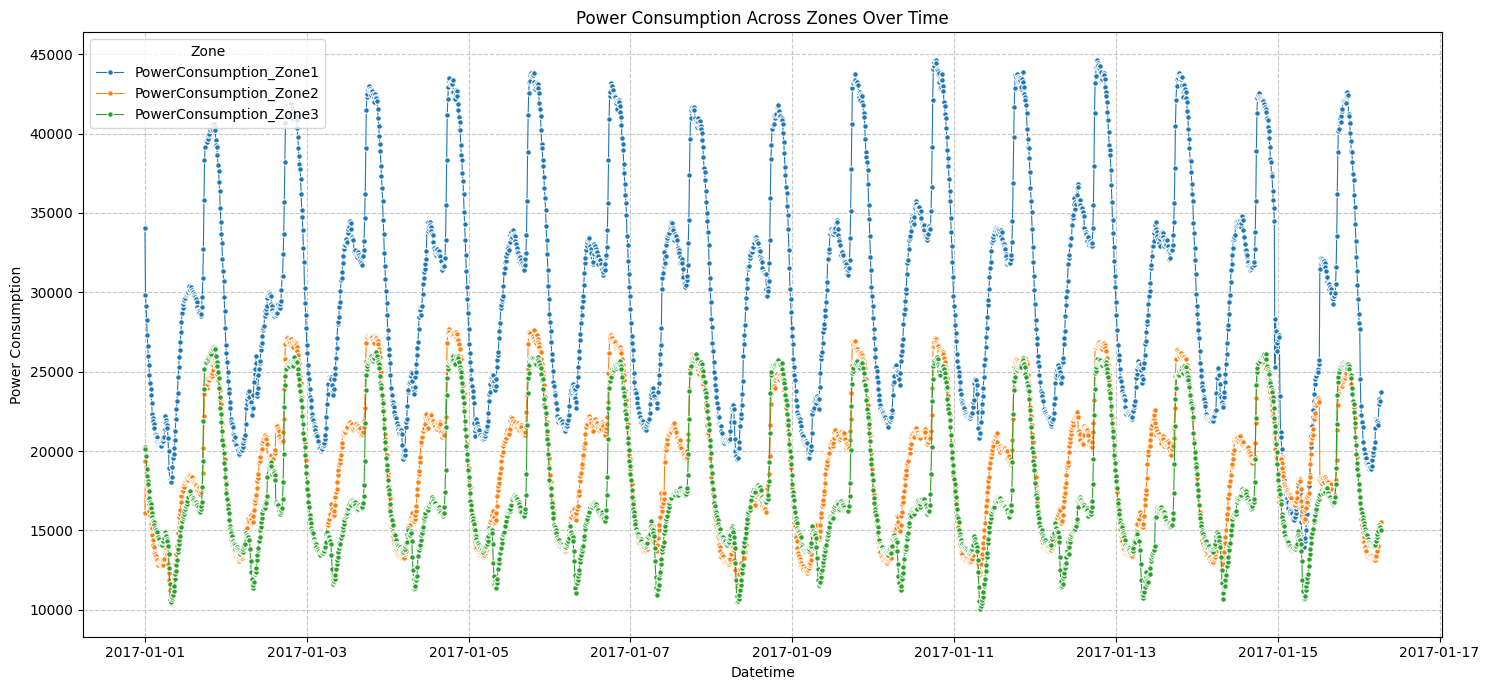

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns
consumption_zones_df = data[['Datetime', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

# Melt the DataFrame to long format for easier plotting
consumption_zones_melted = consumption_zones_df.melt(id_vars=['Datetime'],
                                                     var_name='Consumption_Zone',
                                                     value_name='Power_Consumption')

plt.figure(figsize=(15, 7))
sns.lineplot(data=consumption_zones_melted,
             x='Datetime',
             y='Power_Consumption',
             hue='Consumption_Zone',
             marker='o',
             markersize=4,
             linewidth=0.8)

plt.title('Power Consumption Across Zones Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Zone')
plt.tight_layout()
plt.show()

#Outliar Removal

In [43]:
# Outlier removal using IQR method
# Using relevant numerical columns from the dataset
scaled_columns = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Total_Consumption']

Q1 = data[scaled_columns].quantile(0.25)
Q3 = data[scaled_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where any of the scaled_columns have outliers
data_out = data[~((data[scaled_columns] < (Q1 - 1.5 * IQR)) |
              (data[scaled_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before outlier removal:", data.shape)
print("After outlier removal:", data_out.shape)

Before outlier removal: (2200, 18)
After outlier removal: (1777, 18)


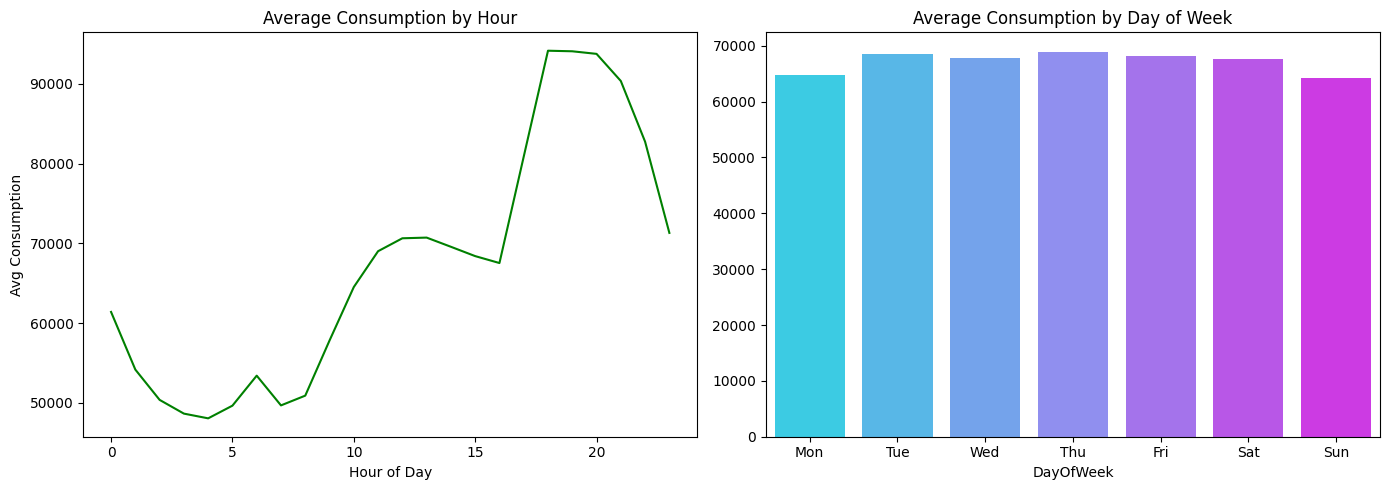

In [9]:
# Hourly and Day-wise Consumption

hourly = data.groupby('Hour')['Total_Consumption'].mean()
daily = data.groupby('DayOfWeek')['Total_Consumption'].mean()

fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.lineplot(x=hourly.index, y=hourly.values, ax=ax[0], color='green')
ax[0].set_title('Average Consumption by Hour')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Avg Consumption')

sns.barplot(x=daily.index, y=daily.values, ax=ax[1], palette='cool')
ax[1].set_title('Average Consumption by Day of Week')
ax[1].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.tight_layout()
plt.show()



In [10]:
# Step 5: Feature Selection
features = ['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','Hour','Day','Month','Weekday']
X = data[features]
y = data['Total_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Initialize and Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Initialize and Train KNN
knn = KNeighborsRegressor(n_neighbors=5)  # you can tune k later
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Approximate accuracy percentage using R²
    accuracy = r2 * 100

    results[name] = {
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4),
        'Accuracy (%)': round(accuracy, 2)
    }

results_data = pd.DataFrame(results).T
print(results_data)

                       MAE     RMSE      R²  Accuracy (%)
Linear Regression  7056.26  8483.62  0.6989         69.89
Random Forest      1931.20  2635.64  0.9709         97.09
KNN                3753.32  5309.94  0.8821         88.21


✅ Dataset Loaded
Shape: (2200, 17)
             Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1 2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2 2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3 2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4 2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  Hour  Day  Month  Weekday  Total_Consumption  Year  \


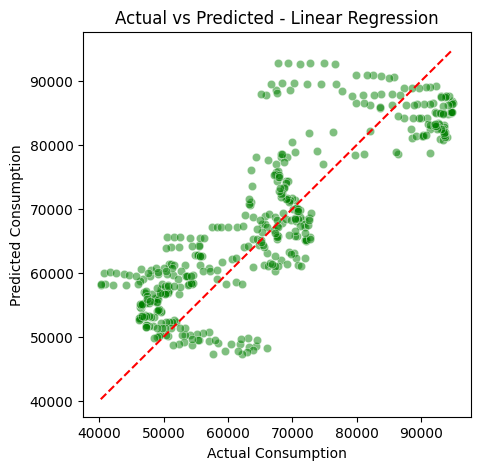

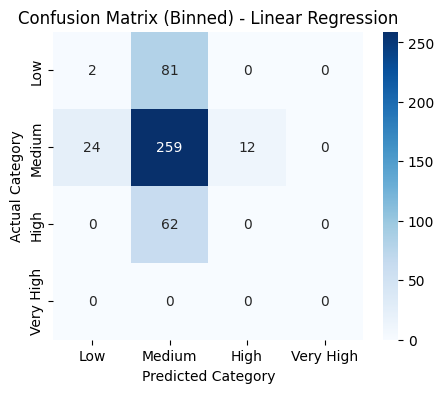

💾 Model saved as linear_regression_model.pkl

🚀 Training Random Forest ...
✅ Random Forest Performance:
  MAE: 1931.20
  RMSE: 2635.64
  R² Score: 0.9709


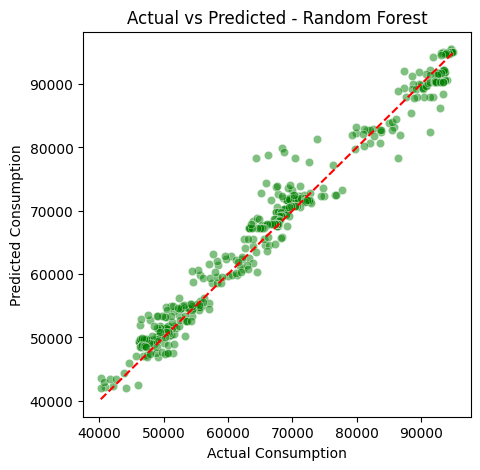

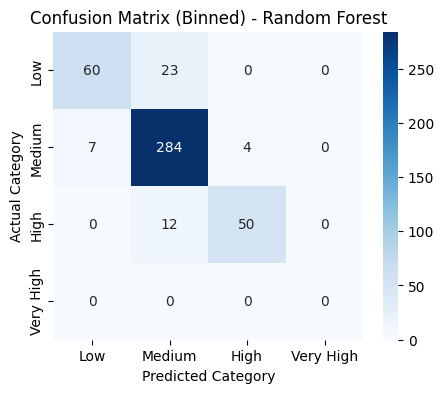

💾 Model saved as random_forest_model.pkl

🚀 Training KNN ...
✅ KNN Performance:
  MAE: 3753.32
  RMSE: 5309.94
  R² Score: 0.8821


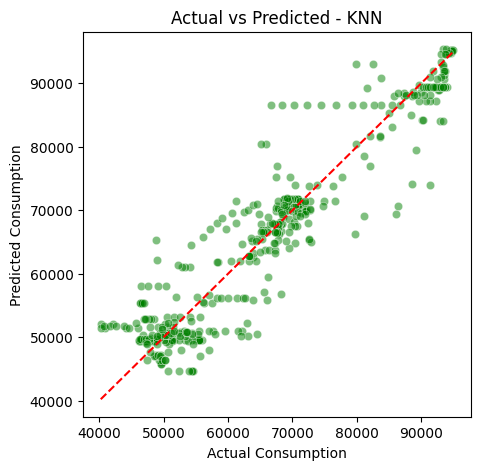

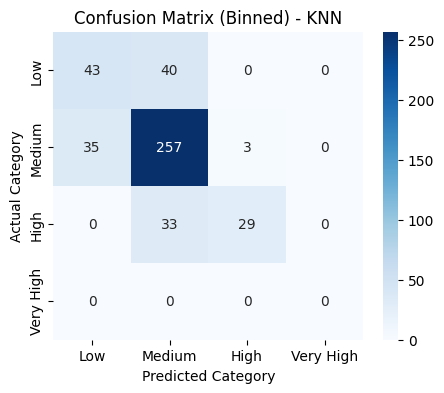

💾 Model saved as knn_model.pkl

📊 Model Performance Summary:
               Model          MAE         RMSE  R2_Score
0  Linear Regression  7056.256108  8483.618016  0.698935
1      Random Forest  1931.197241  2635.638107  0.970942
2                KNN  3753.322330  5309.941252  0.882056


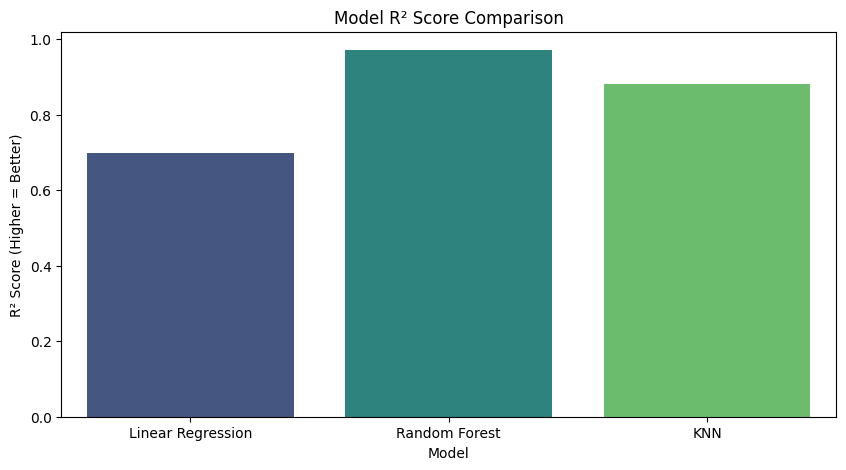

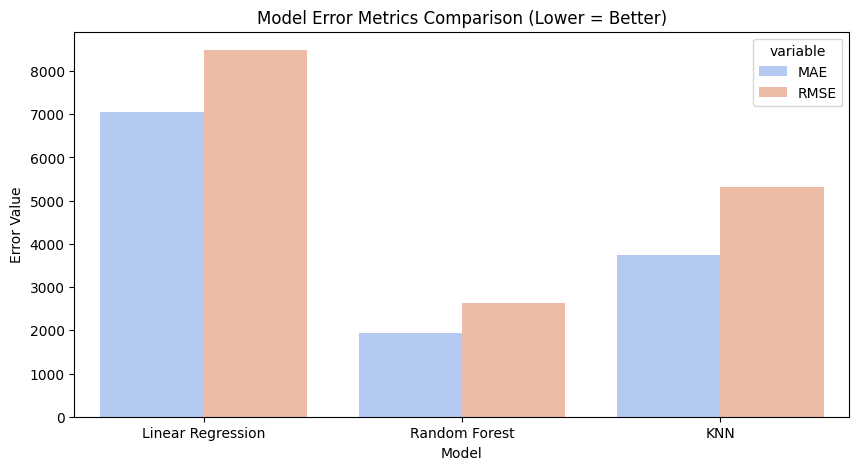


🎯 Best Model Based on R² Score:
Model       Random Forest
MAE           1931.197241
RMSE          2635.638107
R2_Score         0.970942
Name: 1, dtype: object


In [12]:

# ELECTRICITY CONSUMPTION PREDICTION (REGRESSION)
# Models: Linear Regression, Random Forest, KNN
# Comparison + Evaluation + Confusion-Matrix-style View


# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import joblib

# --- Step 2: Load and Inspect Data ---
print("✅ Dataset Loaded")
print("Shape:", data.shape)
print(data.head())

# --- Step 3: Feature Engineering ---
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Total_Consumption'] = data['PowerConsumption_Zone1'] + data['PowerConsumption_Zone2'] + data['PowerConsumption_Zone3']

data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['IsWeekend'] = (data['DayOfWeek'] >= 5).astype(int)

# --- Step 4: Select Features & Target ---
features = ['Temperature', 'Humidity', 'WindSpeed',
            'GeneralDiffuseFlows', 'DiffuseFlows',
            'Hour', 'DayOfWeek', 'IsWeekend', 'Month']

target = 'Total_Consumption'

X = data[features]
y = data[target]

# --- Step 5: Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 6: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=False
)
print("✅ Data Split Completed")

# --- Step 7: Initialize Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# --- Step 8: Train, Evaluate, and Visualize ---
results = []

for name, model in models.items():
    print(f"\n🚀 Training {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Regression Metrics ---
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2_Score": r2})

    print(f"✅ {name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")

    # --- Scatter Plot (Actual vs Predicted) ---
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='green')
    plt.xlabel("Actual Consumption")
    plt.ylabel("Predicted Consumption")
    plt.title(f"Actual vs Predicted - {name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    # --- Pseudo Confusion Matrix (Categorical) ---
    bins = [0, 50000, 90000, 130000, np.inf]  # example bins for Low/Medium/High/Very High
    labels = ['Low', 'Medium', 'High', 'Very High']

    actual_bins = pd.cut(y_test, bins=bins, labels=labels)
    predicted_bins = pd.cut(y_pred, bins=bins, labels=labels)

    cm = confusion_matrix(actual_bins, predicted_bins, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Binned) - {name}')
    plt.xlabel('Predicted Category')
    plt.ylabel('Actual Category')
    plt.show()

    # --- Save Model ---
    filename = name.replace(" ", "_").lower() + "_model.pkl"
    joblib.dump(model, filename)
    print(f"💾 Model saved as {filename}")

# --- Step 9: Comparison Summary ---
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:")
print(results_df)

# --- Step 10: Visual Comparison ---
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='R2_Score', palette='viridis')
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score (Higher = Better)")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['MAE', 'RMSE']),
            x='Model', y='value', hue='variable', palette='coolwarm')
plt.title("Model Error Metrics Comparison (Lower = Better)")
plt.ylabel("Error Value")
plt.show()

print("\n🎯 Best Model Based on R² Score:")
best_model = results_df.loc[results_df['R2_Score'].idxmax()]
print(best_model)


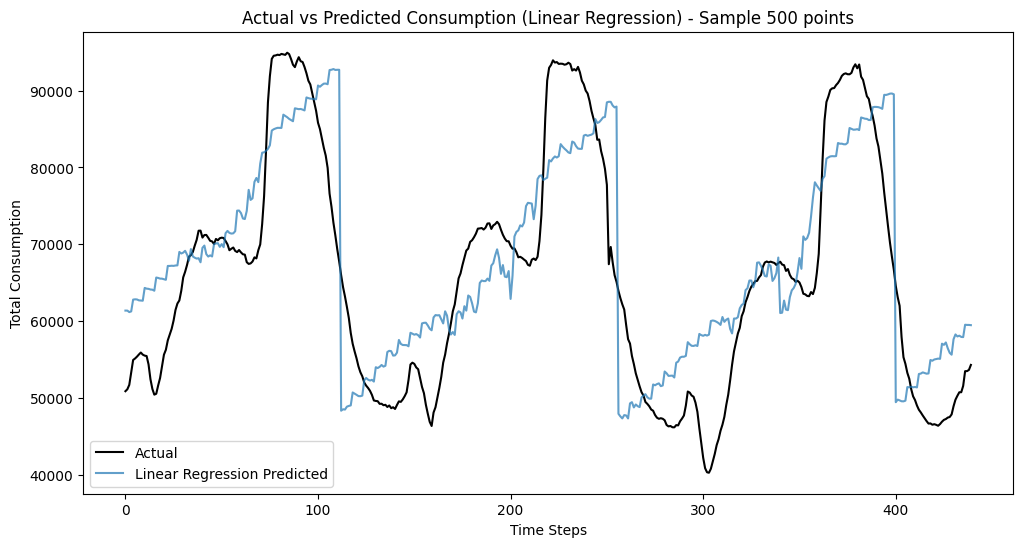

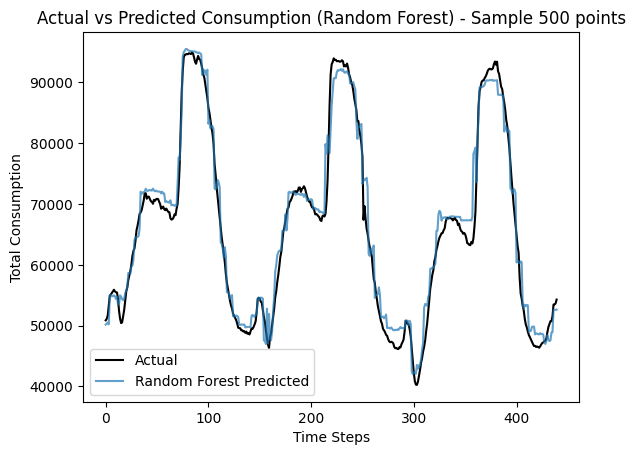

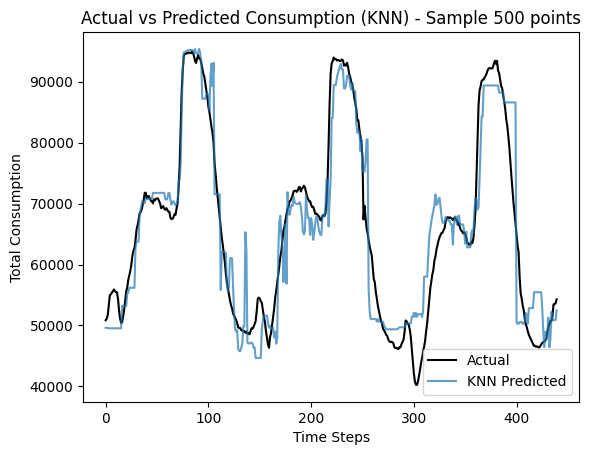

In [13]:
plt.figure(figsize=(12,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(y_test.values[:500], label='Actual', color='black')
    plt.plot(y_pred[:500], label=f'{name} Predicted', alpha=0.7)
    plt.title(f'Actual vs Predicted Consumption ({name}) - Sample 500 points')
    plt.xlabel('Time Steps')
    plt.ylabel('Total Consumption')
    plt.legend()
    plt.show()


🔹 Feature Importance Scores:
               Feature  Importance
5                 Hour    0.856523
3  GeneralDiffuseFlows    0.099707
4         DiffuseFlows    0.020015
6            DayOfWeek    0.011532
0          Temperature    0.004567
1             Humidity    0.004299
2            WindSpeed    0.002420
7            IsWeekend    0.000937
8                Month    0.000000


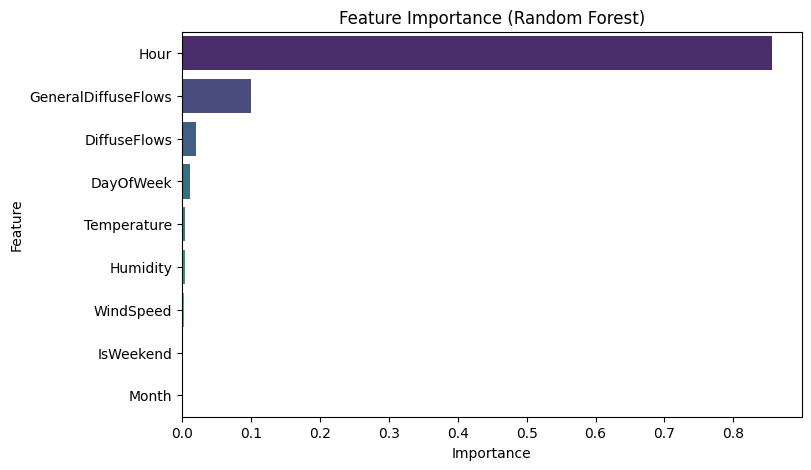

In [14]:
# Step 7: Feature Importance (Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("🔹 Feature Importance Scores:")
print(feat_importance)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

Time-Series Pattern Visualization

Visualize how power consumption changes over time (daily/weekly/seasonal trends):

(a) Daily Trend

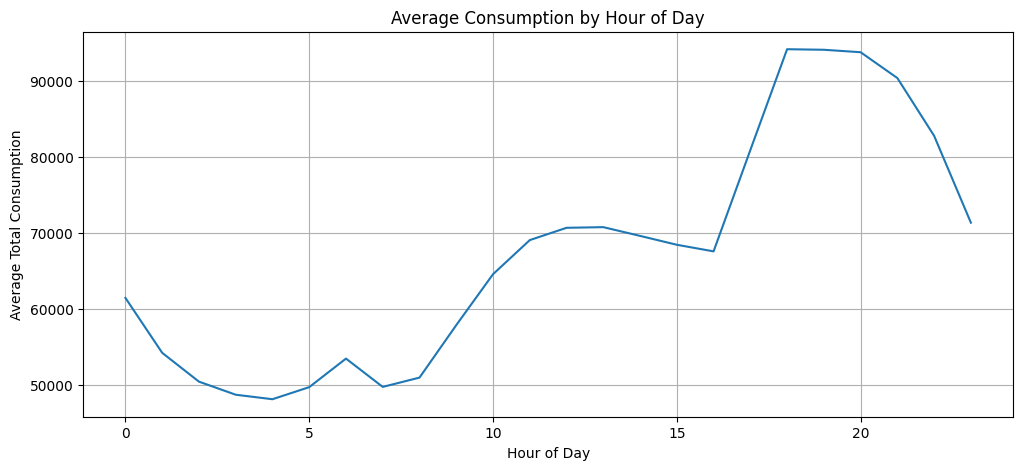

In [15]:
plt.figure(figsize=(12,5))
data.groupby('Hour')['Total_Consumption'].mean().plot(kind='line', color='tab:blue')
plt.title("Average Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Consumption")
plt.grid(True)
plt.show()


(b) Monthly Trend

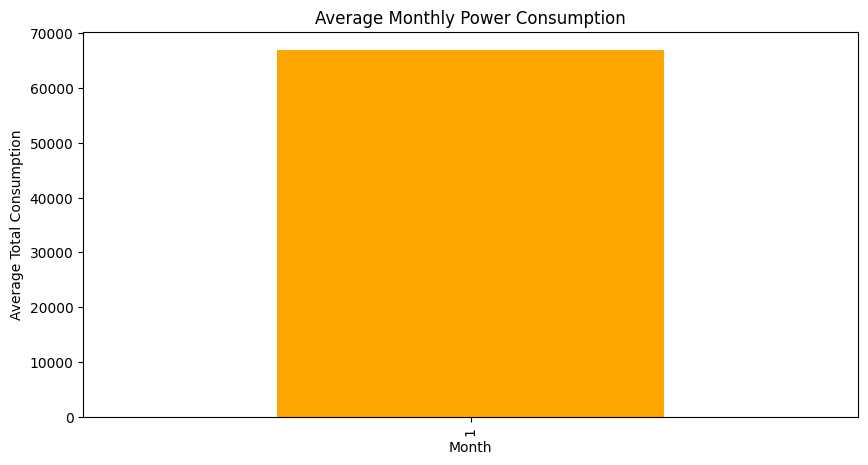

In [16]:
plt.figure(figsize=(10,5))
data.groupby('Month')['Total_Consumption'].mean().plot(kind='bar', color='orange')
plt.title("Average Monthly Power Consumption")
plt.xlabel("Month")
plt.ylabel("Average Total Consumption")
plt.show()


(d) Humidity vs Consumption

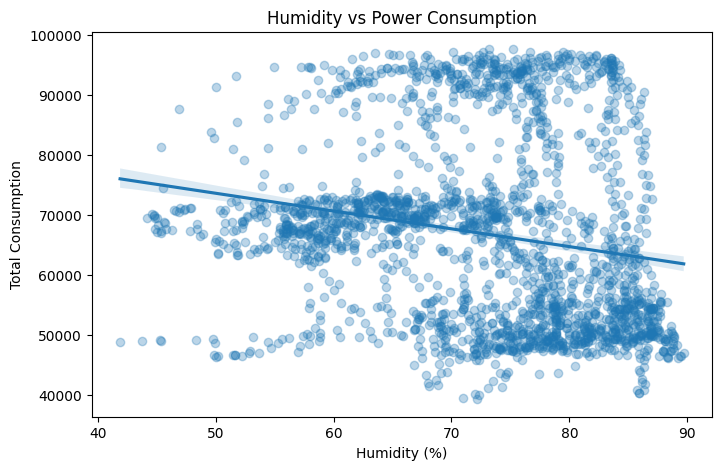

In [17]:
plt.figure(figsize=(8,5))
sns.regplot(x='Humidity', y='Total_Consumption', data=data, scatter_kws={'alpha':0.3})
plt.title("Humidity vs Power Consumption")
plt.xlabel("Humidity (%)")
plt.ylabel("Total Consumption")
plt.show()


In [18]:
# Step 8: Model Saving and Deployment Preparation
best_model = models['Random Forest']
joblib.dump(best_model, 'energy_consumption_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and Scaler saved successfully!")
print("Files generated: energy_consumption_model.pkl, scaler.pkl")

✅ Model and Scaler saved successfully!
Files generated: energy_consumption_model.pkl, scaler.pkl
